In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble  import RandomForestClassifier , AdaBoostClassifier

In [3]:
data = pd.read_csv('../Desktop/anaconda3/heart.csv')

In [4]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
89,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
198,62,1,0,120,267,0,1,99,1,1.8,1,2,3,0
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0


In [5]:
to_drop = ['fbs' , 'restecg' , 'exang']
data.drop(to_drop , axis = 1 , inplace=True)

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,thalach,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,149.646865,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,22.905161,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data['ca'].unique()

array([0, 2, 1, 3, 4])

In [8]:
data['oldpeak'].unique()

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

In [9]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
thalach     0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.shape

(303, 11)

In [12]:
data.drop_duplicates(inplace = True)

In [13]:
data.shape

(302, 11)

In [14]:
y = data['target']
X = data.drop(['target'] , axis = 1)

In [15]:
from collections import Counter
Counter(y)

Counter({1: 164, 0: 138})

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,
                                                       test_size = 0.15,
                                                       random_state = 1234 ,
                                                       stratify = y
                                                      )

In [17]:
dtree = DecisionTreeClassifier()
rand_forest = RandomForestClassifier(n_jobs=-1)
ada_boost = AdaBoostClassifier(learning_rate = 0.01)

In [18]:
%%time
dtree.fit(X_train , y_train)

CPU times: user 6.28 ms, sys: 2.1 ms, total: 8.38 ms
Wall time: 6.84 ms


DecisionTreeClassifier()

In [19]:
features = list(X_train.columns)
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'thal']

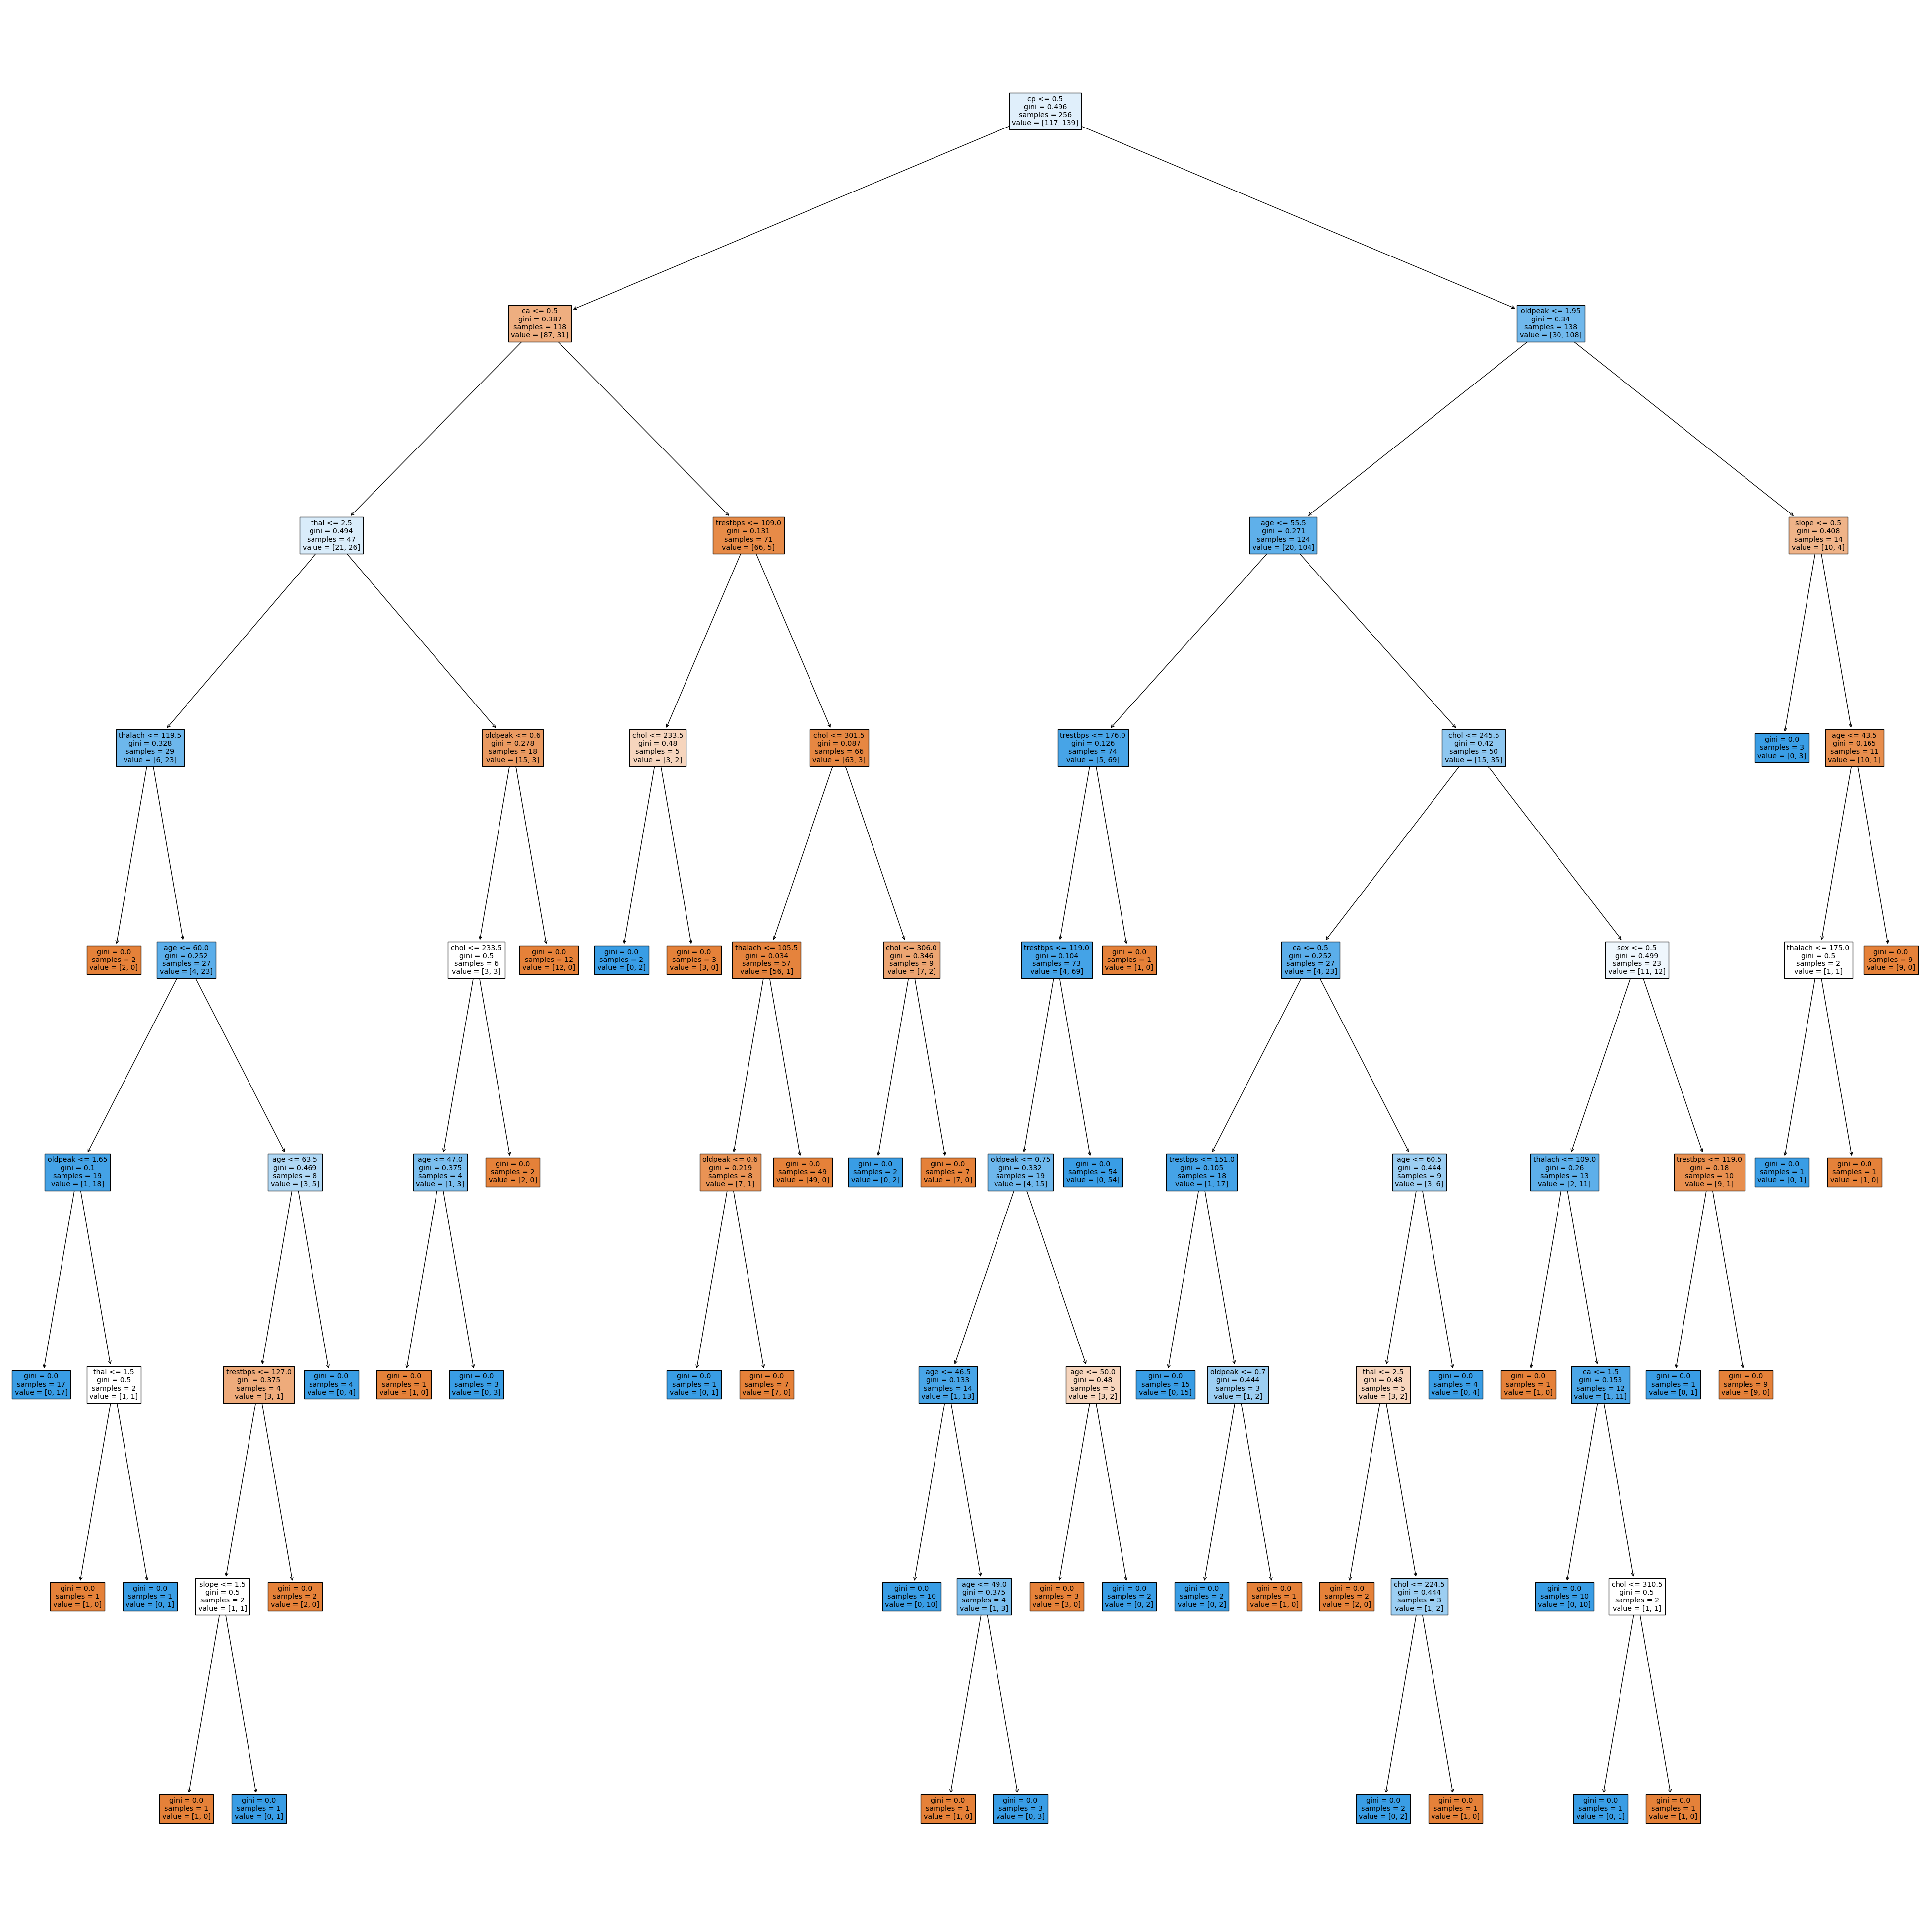

In [20]:
plt.figure(figsize =(50 , 50))
plot_tree(dtree , feature_names = features , filled = True)
plt.show()

In [21]:
rand_forest.fit(X_train , y_train)

RandomForestClassifier(n_jobs=-1)

In [22]:
ada_boost.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.01)

In [23]:
features

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [24]:
features_imp = dtree.feature_importances_
features_imp

array([0.11663848, 0.04953493, 0.27064174, 0.05535091, 0.09997756,
       0.04304147, 0.12380941, 0.03853541, 0.11759744, 0.08487265])

In [25]:
for imp , feat in zip(features_imp , features):
    print(f'{feat} : {imp * 100}')

age : 11.66384783755742
sex : 4.9534933411644735
cp : 27.064173727624098
trestbps : 5.535090806319338
chol : 9.997756356312536
thalach : 4.30414729600538
oldpeak : 12.380940860643557
slope : 3.8535405441880264
ca : 11.759744373823374
thal : 8.487264856361797


In [26]:
y_pred = dtree.predict(X_test)

In [27]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.84      0.84      0.84        25

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [28]:
y_pred_rand = rand_forest.predict(X_test)

In [29]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.84      0.84      0.84        25

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [30]:
y_pred_ada = ada_boost.predict(X_test)

In [31]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.84      0.84      0.84        25

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [32]:
features_imp = rand_forest.feature_importances_
for imp , feat in zip(features_imp , features):
    print(f'{feat} : {imp * 100}')    


age : 8.662567054458094
sex : 3.471660058983665
cp : 16.169686134452906
trestbps : 7.6117453245353195
chol : 8.279685263533377
thalach : 12.443650672728989
oldpeak : 12.250954383134662
slope : 6.080993088213872
ca : 13.655586033507477
thal : 11.373471986451648


In [33]:
y_pred = rand_forest.predict(X_test)
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74        17
           1       0.88      0.76      0.81        29

    accuracy                           0.78        46
   macro avg       0.77      0.79      0.78        46
weighted avg       0.80      0.78      0.79        46



In [34]:
features_imp = ada_boost.feature_importances_
for imp , feat in zip(features_imp , features):
    print(f'{feat} : {imp * 100}')    



age : 0.0
sex : 0.0
cp : 42.0
trestbps : 0.0
chol : 0.0
thalach : 0.0
oldpeak : 0.0
slope : 0.0
ca : 30.0
thal : 28.000000000000004


In [35]:
y_pred = ada_boost.predict(X_test)
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.92      0.79      0.85        29

    accuracy                           0.83        46
   macro avg       0.82      0.84      0.82        46
weighted avg       0.84      0.83      0.83        46



In [36]:
features_imp = dtree.feature_importances_
for imp , feat in zip(features_imp , features):
    print(f'{feat} : {imp * 100}')    




age : 11.66384783755742
sex : 4.9534933411644735
cp : 27.064173727624098
trestbps : 5.535090806319338
chol : 9.997756356312536
thalach : 4.30414729600538
oldpeak : 12.380940860643557
slope : 3.8535405441880264
ca : 11.759744373823374
thal : 8.487264856361797


In [37]:
y_pred = dtree.predict(X_test)
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        21
           1       0.84      0.84      0.84        25

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic = LogisticRegression(n_jobs = -1 , )

In [40]:
logistic.fit(X_train , y_train)

/Users/shilalamichhane/Desktop/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1)

In [41]:
y_pred = logistic.predict(X_test)

In [42]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81        21
           1       0.80      0.96      0.87        25

    accuracy                           0.85        46
   macro avg       0.87      0.84      0.84        46
weighted avg       0.86      0.85      0.84        46



In [43]:
y_pred

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1])

In [44]:
y_pred_proba = logistic.predict_proba(X_test)

In [45]:
y_pred_proba

array([[0.90937767, 0.09062233],
       [0.08637554, 0.91362446],
       [0.49816374, 0.50183626],
       [0.64504501, 0.35495499],
       [0.09430235, 0.90569765],
       [0.99144035, 0.00855965],
       [0.07559561, 0.92440439],
       [0.09240121, 0.90759879],
       [0.85364687, 0.14635313],
       [0.37560904, 0.62439096],
       [0.47891729, 0.52108271],
       [0.43658917, 0.56341083],
       [0.17073452, 0.82926548],
       [0.43456816, 0.56543184],
       [0.49943373, 0.50056627],
       [0.49671358, 0.50328642],
       [0.87733574, 0.12266426],
       [0.92370623, 0.07629377],
       [0.97789927, 0.02210073],
       [0.99140778, 0.00859222],
       [0.06077768, 0.93922232],
       [0.02135165, 0.97864835],
       [0.40498901, 0.59501099],
       [0.68387373, 0.31612627],
       [0.1533686 , 0.8466314 ],
       [0.31874707, 0.68125293],
       [0.07253715, 0.92746285],
       [0.71250201, 0.28749799],
       [0.00546799, 0.99453201],
       [0.05100837, 0.94899163],
       [0.

In [49]:
y_pred_proba = rand_forest.predict_proba(X_test)
y_pred_proba

array([[0.65, 0.35],
       [0.29, 0.71],
       [0.24, 0.76],
       [0.51, 0.49],
       [0.13, 0.87],
       [0.92, 0.08],
       [0.07, 0.93],
       [0.03, 0.97],
       [0.89, 0.11],
       [0.35, 0.65],
       [0.42, 0.58],
       [0.55, 0.45],
       [0.  , 1.  ],
       [0.19, 0.81],
       [0.22, 0.78],
       [0.38, 0.62],
       [0.85, 0.15],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.72, 0.28],
       [0.05, 0.95],
       [0.18, 0.82],
       [0.33, 0.67],
       [0.49, 0.51],
       [0.11, 0.89],
       [0.36, 0.64],
       [0.33, 0.67],
       [0.91, 0.09],
       [0.1 , 0.9 ],
       [0.14, 0.86],
       [0.58, 0.42],
       [0.94, 0.06],
       [0.28, 0.72],
       [0.25, 0.75],
       [0.3 , 0.7 ],
       [0.56, 0.44],
       [0.14, 0.86],
       [0.52, 0.48],
       [0.45, 0.55],
       [0.3 , 0.7 ],
       [0.94, 0.06],
       [0.16, 0.84],
       [0.84, 0.16],
       [0.24, 0.76],
       [0.62, 0.38],
       [0.17, 0.83]])